<a href="https://colab.research.google.com/github/dawoodrizwan-05/Spam-email-prediction-using-ML/blob/main/spam_email_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Data Collection & Pre-Processing**

In [ ]:
# loading data from csv file to pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replace the null values with null string
mail_data = raw_mail_data.where ((pd.notnull(raw_mail_data)),' ')

In [ ]:
# print the rows of the dataframe
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

**Label Encoding**

In [ ]:
# spam as 0
# ham as 1
mail_data.loc[mail_data['Category'] == 'spam','Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham','Category',] = 1

In [ ]:
# separate data as texts and label
X = mail_data['Message']
Y = mail_data['Category']

In [ ]:
print (X)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print (Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


**Split into train & test data**


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


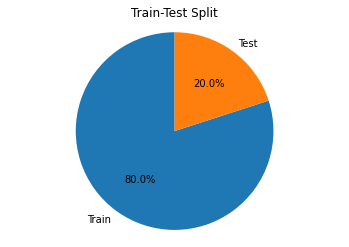

In [ ]:
# Counting instances in each set
train_count = len(X_train)
test_count = len(X_test)

# Creating labels and sizes for the pie chart
labels = ['Train', 'Test']
sizes = [train_count, test_count]

# Creating a pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Setting aspect ratio to be equal so that the pie chart looks like a circle
ax1.axis('equal')

# Adding a title to the pie chart
plt.title('Train-Test Split')

# Displaying the pie chart
plt.show()

**Feature Extraction**

In [ ]:
# convert text data into numerical values that can be used as input to the logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

**Logistic Regression**

Training Model

In [ ]:
# trainning the Logistic Regression model with the training data
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluate the trained model

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print ('Accuracy on training data :',accuracy_on_training_data)

Accuracy on training data : 0.9670181736594121


In [ ]:
# prediction on testing data
prediction_on_testing_data = model.predict(X_test_features)
LR_accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)

In [ ]:
print ('Accuracy on testing data :', LR_accuracy_on_testing_data)

Accuracy on testing data : 0.9659192825112107


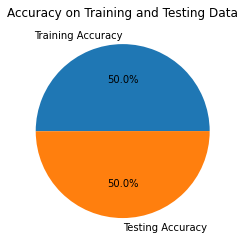

In [ ]:

# Compute the percentage of accuracy for training and testing data
train_percent = accuracy_on_training_data * 100
test_percent = LR_accuracy_on_testing_data * 100

# Create a list of labels for the pie chart
labels = ['Training Accuracy', 'Testing Accuracy']

# Create a list of values for the pie chart
values = [train_percent, test_percent]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Accuracy on Training and Testing Data')

# Show the pie chart
plt.show()

Building a Prediction System

In [ ]:
input_mail = ["Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone"]

# covert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# prediction
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0]==1:
  print('ham mail')

else:
  print('spam mail')

[0]
spam mail


**Support Vector Machine**

Training Model

In [ ]:
# train the SVM model with the training data
model = SVC(kernel='linear')
model.fit(X_train_features, Y_train)


SVC(kernel='linear')

Evaluate the trained model

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)


In [ ]:
print ('Accuracy on training data using SVM :',accuracy_on_training_data)

Accuracy on training data using SVM : 0.9952883105227731


In [ ]:
# prediction on testing data
prediction_on_testing_data = model.predict(X_test_features)
SVM_accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)


In [ ]:
print ('Accuracy of testing data using SVM:',SVM_accuracy_on_testing_data)

Accuracy of testing data using SVM: 0.9820627802690582


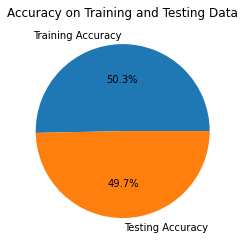

In [ ]:

# Compute the percentage of accuracy for training and testing data
train_percent = accuracy_on_training_data * 100
test_percent = SVM_accuracy_on_testing_data * 100

# Create a list of labels for the pie chart
labels = ['Training Accuracy', 'Testing Accuracy']

# Create a list of values for the pie chart
values = [train_percent, test_percent]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Accuracy on Training and Testing Data')

# Show the pie chart
plt.show()

Building a Prediction System

In [ ]:
input_mail = ["hello ehsan you got winner prize"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# prediction
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0]==1:
  print('ham mail')
else:
  print('spam mail')

[1]
ham mail


**Naive Bayes Model**

Training Model

In [ ]:
# train the Naive Bayes model with the training data
model = MultinomialNB()
model.fit(X_train_features, Y_train)

MultinomialNB()

Evaluate the trained model

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 0.9807045097599282


In [ ]:

# prediction on testing data
prediction_on_testing_data = model.predict(X_test_features)
NB_accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)


In [ ]:
print('Accuracy on testing data:', NB_accuracy_on_testing_data)

Accuracy on testing data: 0.9730941704035875


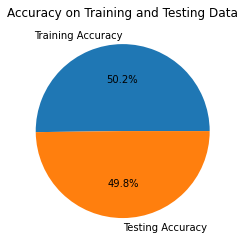

In [ ]:

# Compute the percentage of accuracy for training and testing data
train_percent = accuracy_on_training_data * 100
test_percent = NB_accuracy_on_testing_data * 100

# Create a list of labels for the pie chart
labels = ['Training Accuracy', 'Testing Accuracy']

# Create a list of values for the pie chart
values = [train_percent, test_percent]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Accuracy on Training and Testing Data')

# Show the pie chart
plt.show()

Building a Prediction System

In [ ]:

input_mail = ["Dear, will call Tmorrow.pls accomodate."]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# prediction
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
    print('ham mail')
else:
    print('spam mail')

[1]
ham mail


**Decision Tree**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_features, Y_train)

DecisionTreeClassifier()

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print ('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 1.0


In [ ]:
# prediction on testing data
prediction_on_testing_data = model.predict(X_test_features)
DT_accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)


In [ ]:
print('Accuracy on testing data:', DT_accuracy_on_testing_data)

Accuracy on testing data: 0.9641255605381166


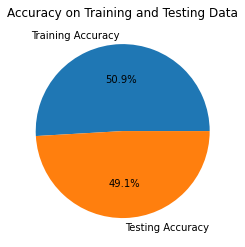

In [ ]:

# Compute the percentage of accuracy for training and testing data
train_percent = accuracy_on_training_data * 100
test_percent = DT_accuracy_on_testing_data * 100

# Create a list of labels for the pie chart
labels = ['Training Accuracy', 'Testing Accuracy']

# Create a list of values for the pie chart
values = [train_percent, test_percent]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Accuracy on Training and Testing Data')

# Show the pie chart
plt.show()

In [ ]:

input_mail = ["hello ehsan you got winner prize"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# prediction
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
    print('ham mail')
else:
    print('spam mail')

[0]
spam mail


**K-nearest Neighbors**

In [ ]:
KN = KNeighborsClassifier()
KN.fit(X_train_features, Y_train)

KNeighborsClassifier()

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print ('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 1.0


In [ ]:
# prediction on testing data
prediction_on_testing_data = model.predict(X_test_features)
KN_accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)


In [ ]:
print('Accuracy on testing data:', KN_accuracy_on_testing_data)

Accuracy on testing data: 0.9641255605381166


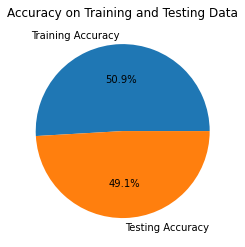

In [ ]:

# Compute the percentage of accuracy for training and testing data
train_percent = accuracy_on_training_data * 100
test_percent = KN_accuracy_on_testing_data * 100

# Create a list of labels for the pie chart
labels = ['Training Accuracy', 'Testing Accuracy']

# Create a list of values for the pie chart
values = [train_percent, test_percent]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Accuracy on Training and Testing Data')

# Show the pie chart
plt.show()

In [ ]:

input_mail = ["hello ehsan you got winner prize"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# prediction
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
    print('ham mail')
else:
    print('spam mail')

[0]
spam mail


**Random Forest**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_features, Y_train)

RandomForestClassifier()

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print ('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 1.0


In [ ]:
# prediction on testing data
prediction_on_testing_data = model.predict(X_test_features)
RF_accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)


In [ ]:
print('Accuracy on testing data:', RF_accuracy_on_testing_data)

Accuracy on testing data: 0.9730941704035875


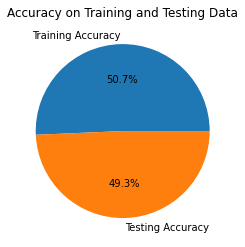

In [ ]:

# Compute the percentage of accuracy for training and testing data
train_percent = accuracy_on_training_data * 100
test_percent = RF_accuracy_on_testing_data * 100

# Create a list of labels for the pie chart
labels = ['Training Accuracy', 'Testing Accuracy']

# Create a list of values for the pie chart
values = [train_percent, test_percent]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Accuracy on Training and Testing Data')

# Show the pie chart
plt.show()

In [ ]:

input_mail = ["hello ehsan you got winner prize"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# prediction
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
    print('ham mail')
else:
    print('spam mail')

[0]
spam mail


**OverAll Accuracies**

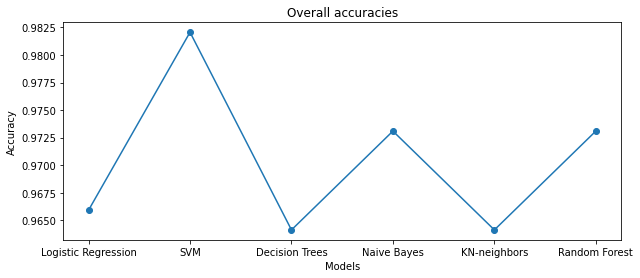

In [ ]:
models = ['Logistic Regression', 'SVM','Decision Trees', 'Naive Bayes', 'KN-neighbors', 'Random Forest']
accuracies = [LR_accuracy_on_testing_data, SVM_accuracy_on_testing_data, DT_accuracy_on_testing_data, NB_accuracy_on_testing_data, KN_accuracy_on_testing_data, RF_accuracy_on_testing_data]

# create the plot with adjusted figure size
fig = plt.figure(figsize=(10, 4))
plt.plot(models, accuracies, marker ='o')
plt.title('Overall accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()



